In [16]:
import numpy as np 
import pandas as pd
import seaborn as sns

from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [15, 8]
plt.style.use("fivethirtyeight")

# do not display warnings in notebook 
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.options.display.max_seq_items = 2000

In [2]:
#Import dataset 
train = pd.read_csv("../../data/train.csv")
test = pd.read_csv("../../data/test.csv")
sample =  pd.read_csv("../../data/sample_submission.csv")

In [3]:
# Shape of the training set 
train.shape

(33750, 15)

In [4]:
# Shape of the test set
test.shape

(14454, 14)

In [5]:
train.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [6]:
# Check for null values
train.isnull().sum()

date_time              0
is_holiday             0
air_pollution_index    0
humidity               0
wind_speed             0
wind_direction         0
visibility_in_miles    0
dew_point              0
temperature            0
rain_p_h               0
snow_p_h               0
clouds_all             0
weather_type           0
weather_description    0
traffic_volume         0
dtype: int64

There are no missing values.

In [7]:
# Find how many unique values are present
train.nunique()

date_time              28589
is_holiday                12
air_pollution_index      290
humidity                  88
wind_speed                17
wind_direction           361
visibility_in_miles        9
dew_point                  9
temperature             5611
rain_p_h                 353
snow_p_h                  12
clouds_all                60
weather_type              11
weather_description       38
traffic_volume          6462
dtype: int64

In [8]:
train.columns

Index(['date_time', 'is_holiday', 'air_pollution_index', 'humidity',
       'wind_speed', 'wind_direction', 'visibility_in_miles', 'dew_point',
       'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all', 'weather_type',
       'weather_description', 'traffic_volume'],
      dtype='object')

In [9]:
features = train.columns
features

Index(['date_time', 'is_holiday', 'air_pollution_index', 'humidity',
       'wind_speed', 'wind_direction', 'visibility_in_miles', 'dew_point',
       'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all', 'weather_type',
       'weather_description', 'traffic_volume'],
      dtype='object')

### Date_time

Date_time has duplicate rows.
1. Most of the features are same for all the duplicate rows.
2. Most importantly the target variable is same for all the duplicate rows.
3. To handle this remove the duplicate rows as they will not be useful for making model.

In [10]:
# Drop the duplicate rows based on date_time features.
train.drop_duplicates(subset=['date_time'], keep='first', inplace=True)

In [11]:
# Shape of train set after removing the duplicate data points.
train.shape

(28589, 15)

In [13]:
target = 'traffic_volume'

### Closely observing the target trends

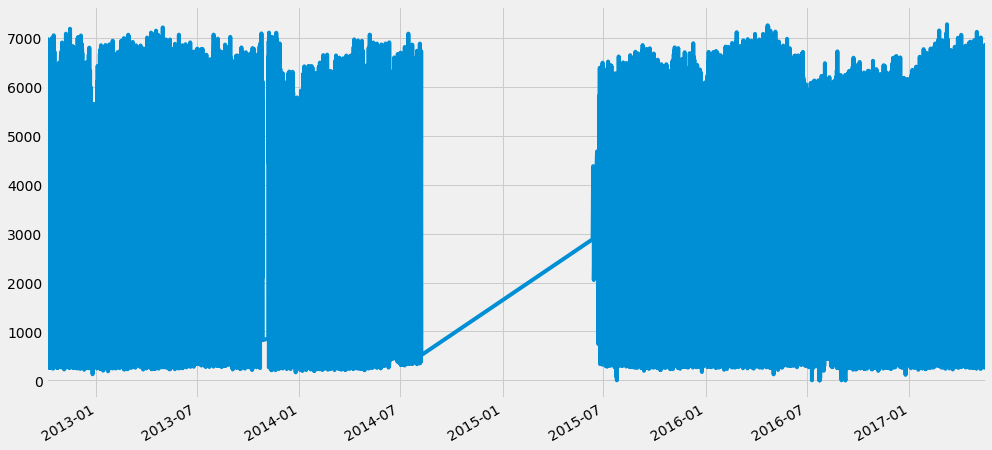

In [18]:
train['date_time'] = pd.to_datetime(train['date_time'], format="%Y-%m-%d %H:%M:%S")
train.index = train['date_time'].values

train[target].plot()

### Traffic_Volumes for 2014-2015 looks fishy (straight line?)

### Trend in One Month 

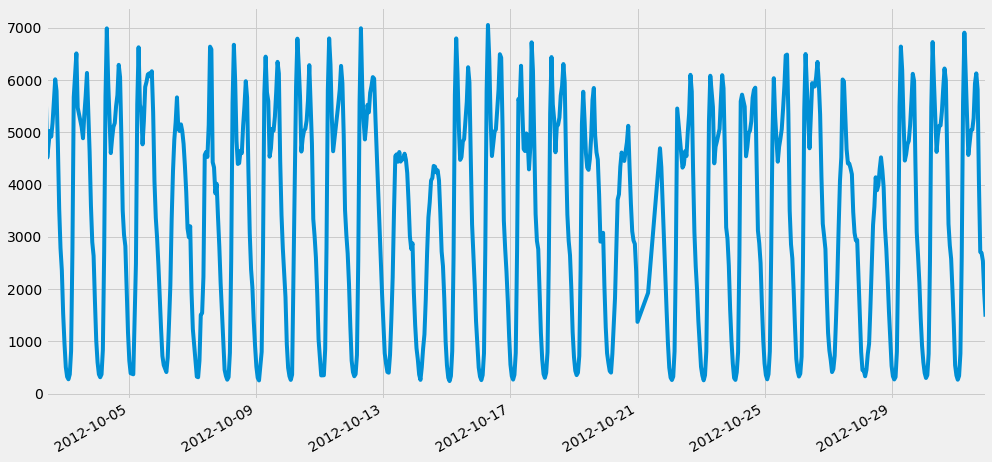

In [19]:
train[(train['date_time'].dt.year == 2012) & (train['date_time'].dt.month == 10)][target].plot()

### Trend in One Day

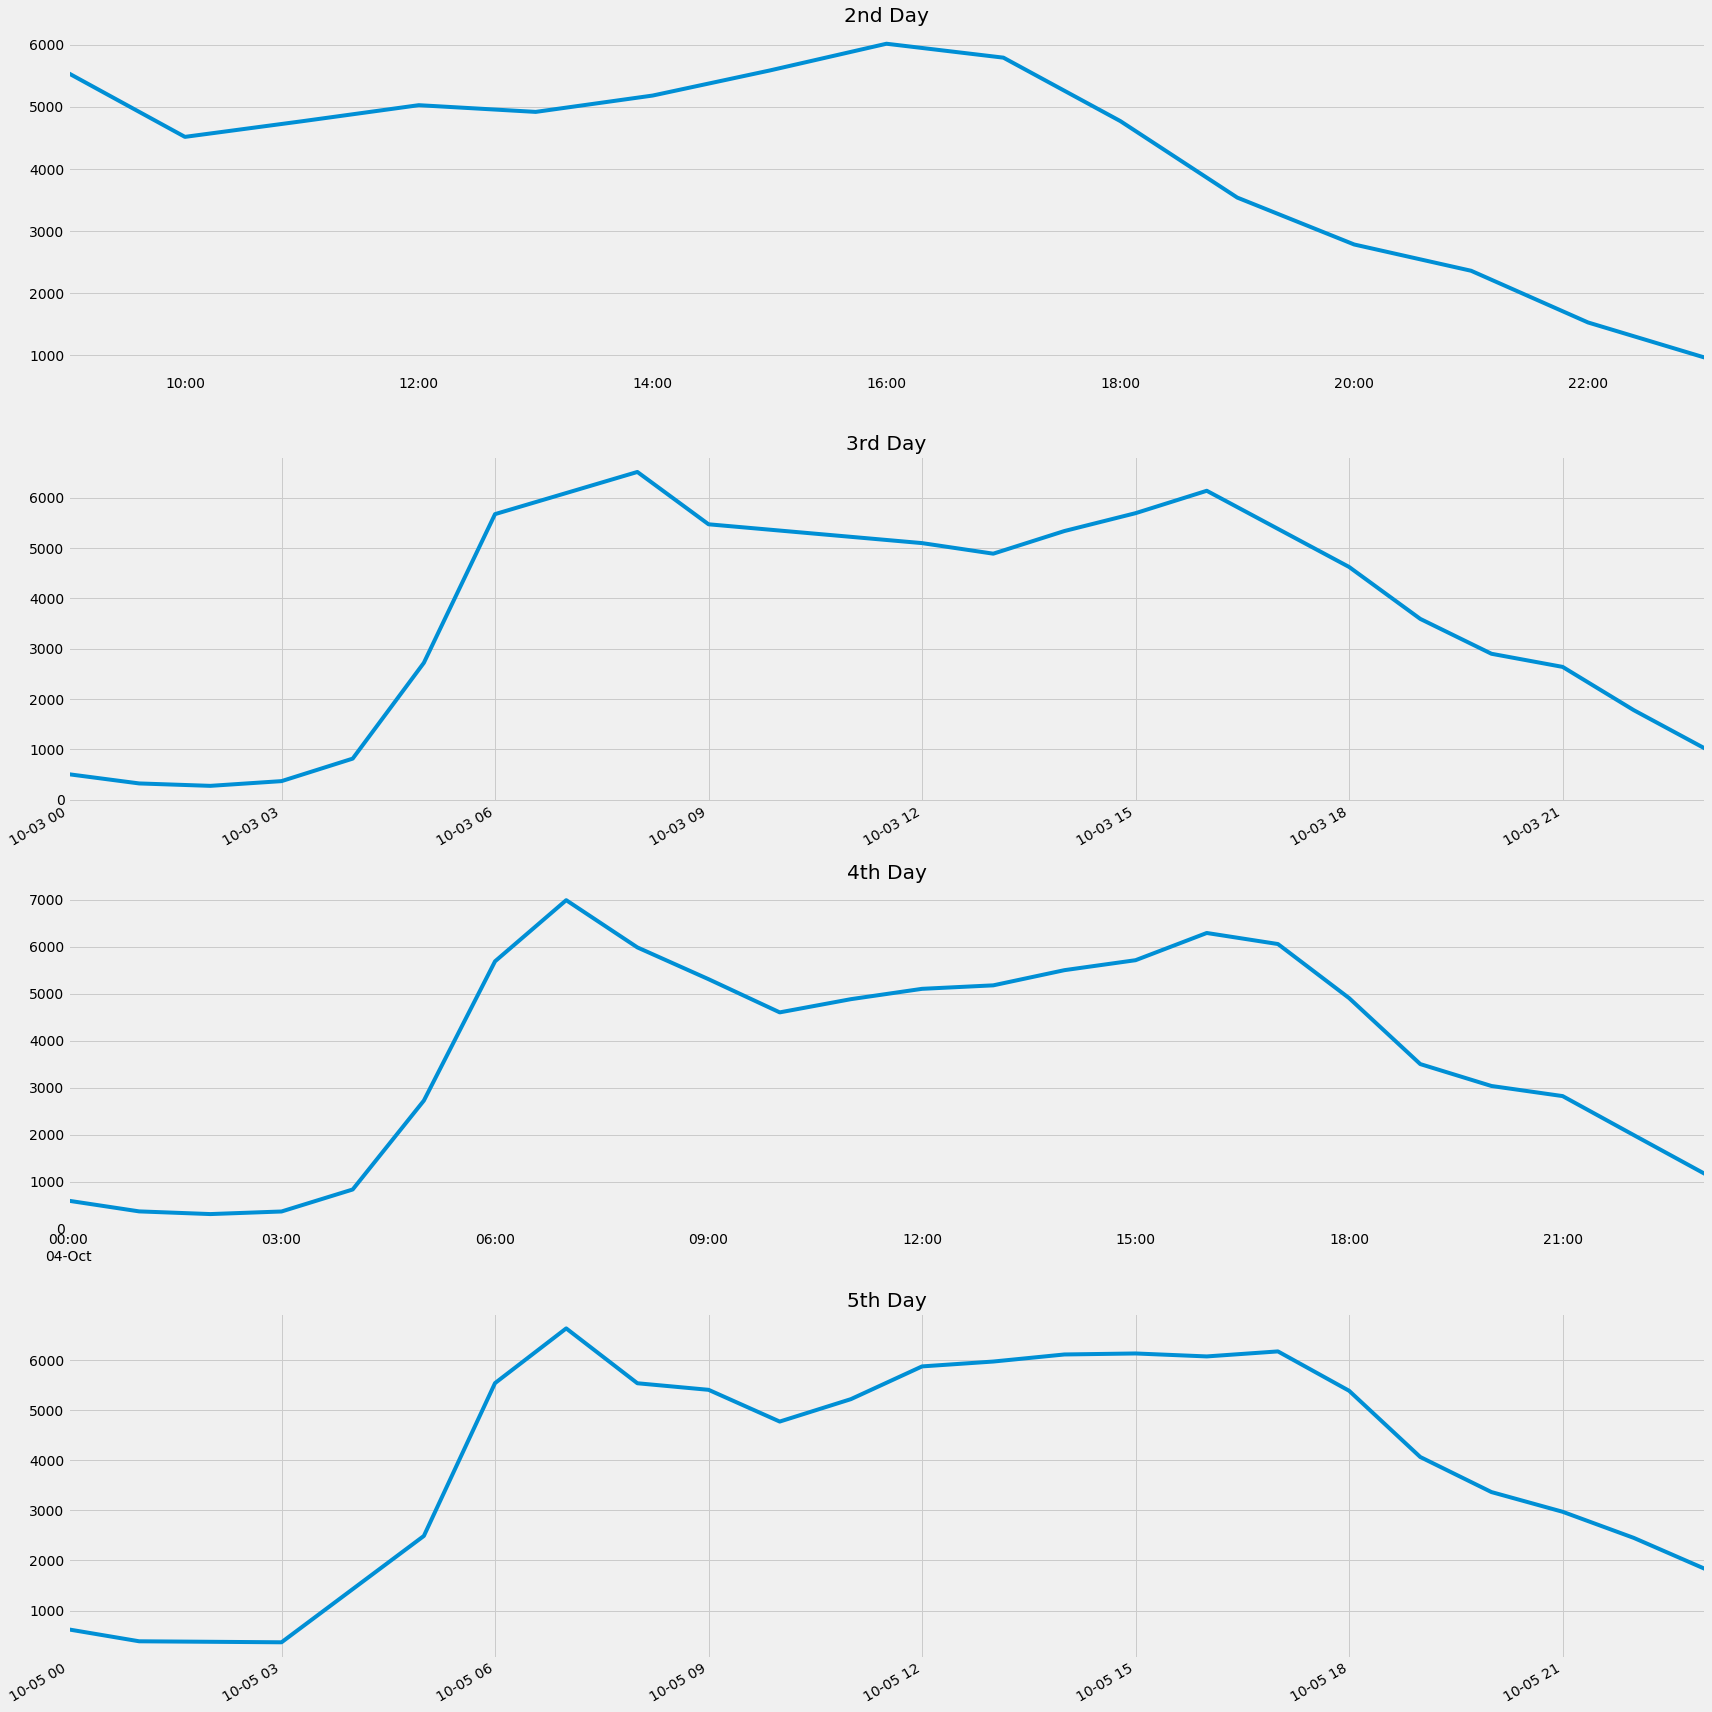

In [20]:
fig = plt.figure(figsize=(24, 24))

plt.subplot(4, 1, 1)
train[(train['date_time'].dt.year == 2012) & (train['date_time'].dt.month == 10) & 
      (train['date_time'].dt.day == 2)][target].plot()
plt.title("2nd Day")

plt.subplot(4, 1, 2)
train[(train['date_time'].dt.year == 2012) & (train['date_time'].dt.month == 10) & 
      (train['date_time'].dt.day == 3)][target].plot()
plt.title("3rd Day")

plt.subplot(4, 1, 3)
train[(train['date_time'].dt.year == 2012) & (train['date_time'].dt.month == 10) & 
      (train['date_time'].dt.day == 4)][target].plot()
plt.title("4th Day")

plt.subplot(4, 1, 4)
train[(train['date_time'].dt.year == 2012) & (train['date_time'].dt.month == 10) & 
      (train['date_time'].dt.day == 5)][target].plot()
plt.title("5th Day")

plt.tight_layout()
plt.show()

### We can observe that the traffic volume is high in working hours i.e when people go to work like morning(6AM - 9AM) and returning back from office(4PM-9PM).
### The traffic is also very less at mid-nights (12AM-4AM)

### On Holidays

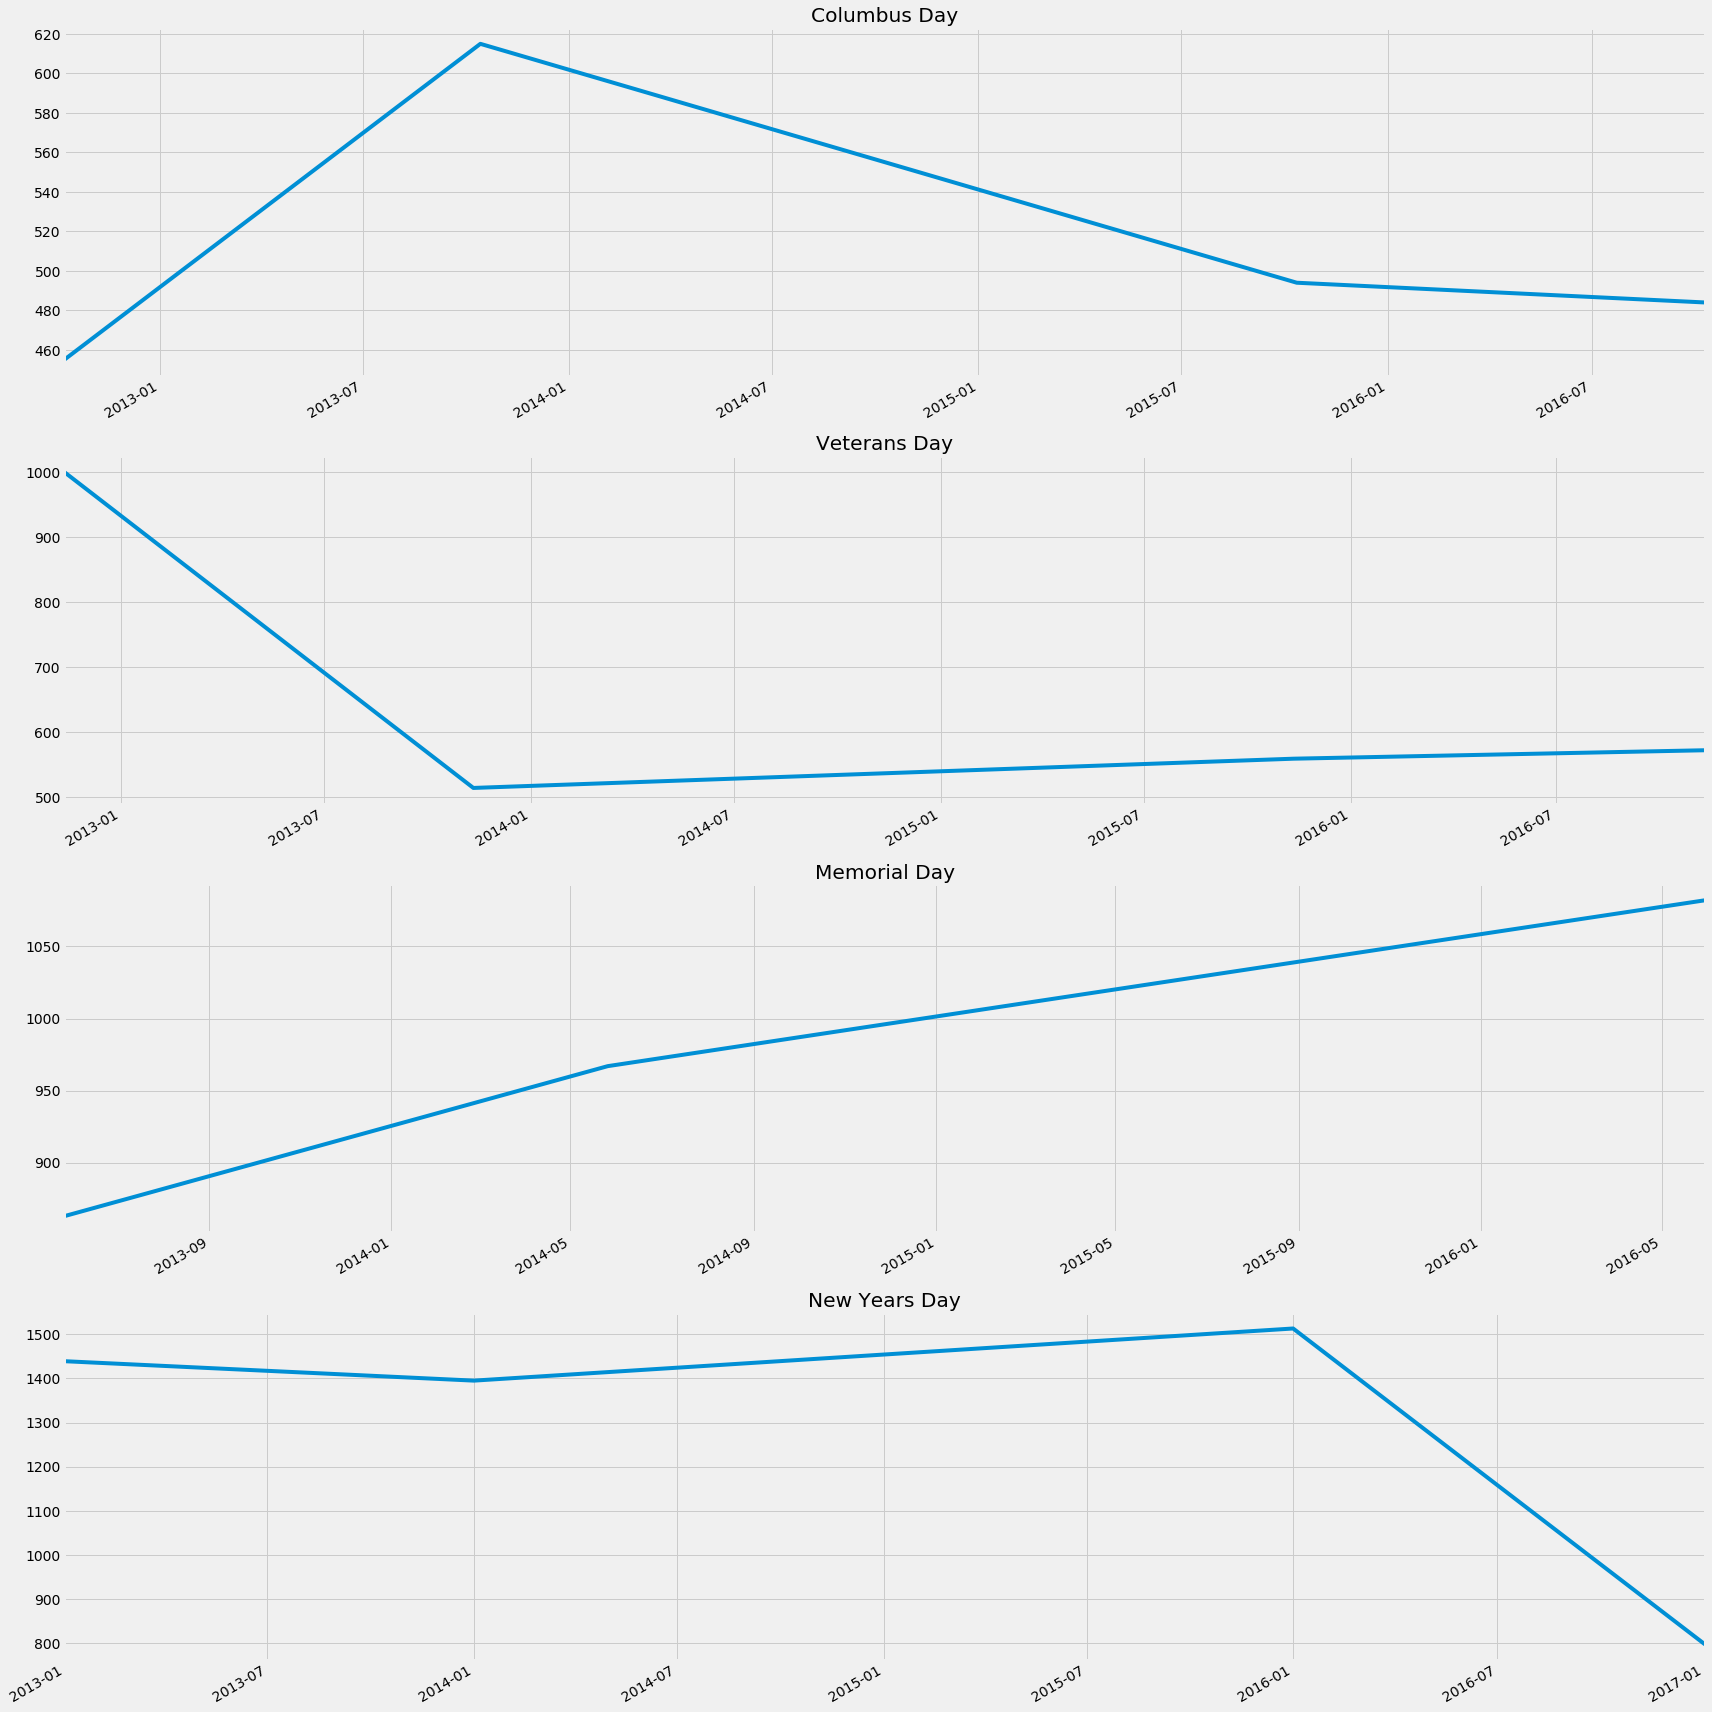

In [21]:
fig = plt.figure(figsize=(24, 24))

plt.subplot(4, 1, 1)
train[(train['is_holiday'] == "Columbus Day")][target].plot()
plt.title("Columbus Day")

plt.subplot(4, 1, 2)
train[(train['is_holiday'] == "Veterans Day")][target].plot()
plt.title("Veterans Day")

plt.subplot(4, 1, 3)
train[(train['is_holiday'] == "Memorial Day")][target].plot()
plt.title("Memorial Day")

plt.subplot(4, 1, 4)
train[(train['is_holiday'] == "New Years Day")][target].plot()
plt.title("New Years Day")

plt.tight_layout()
plt.show()

### Hourly Trends

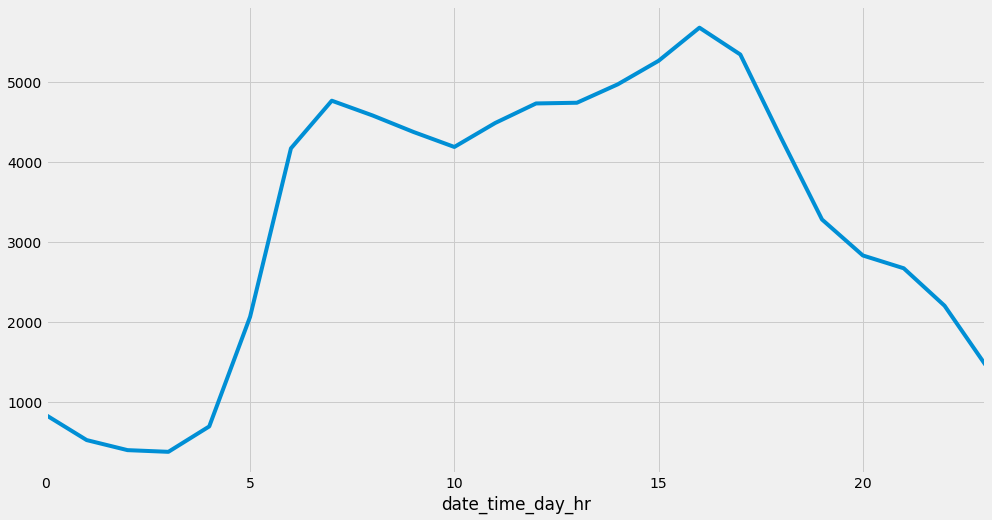

In [22]:
train['date_time_day_hr'] = train['date_time'].dt.hour
train.groupby(['date_time_day_hr'])['traffic_volume'].mean().plot()

### Numeric Features

1. air_pollution_index
2. humidity
3. wind_speed
4. wind_direction
5. visibility_in_miles
6. dew_point
7. temperature
8. rain_p_h
9. snow_p_h
10. clouds_all

11. Target feature: traffic_volume

In [97]:
numeric_features =  ['air_pollution_index', 'humidity', 'wind_speed','wind_direction','visibility_in_miles','dew_point','temperature',
                    'rain_p_h', 'snow_p_h','clouds_all']

In [98]:
target = ['traffic_volume']

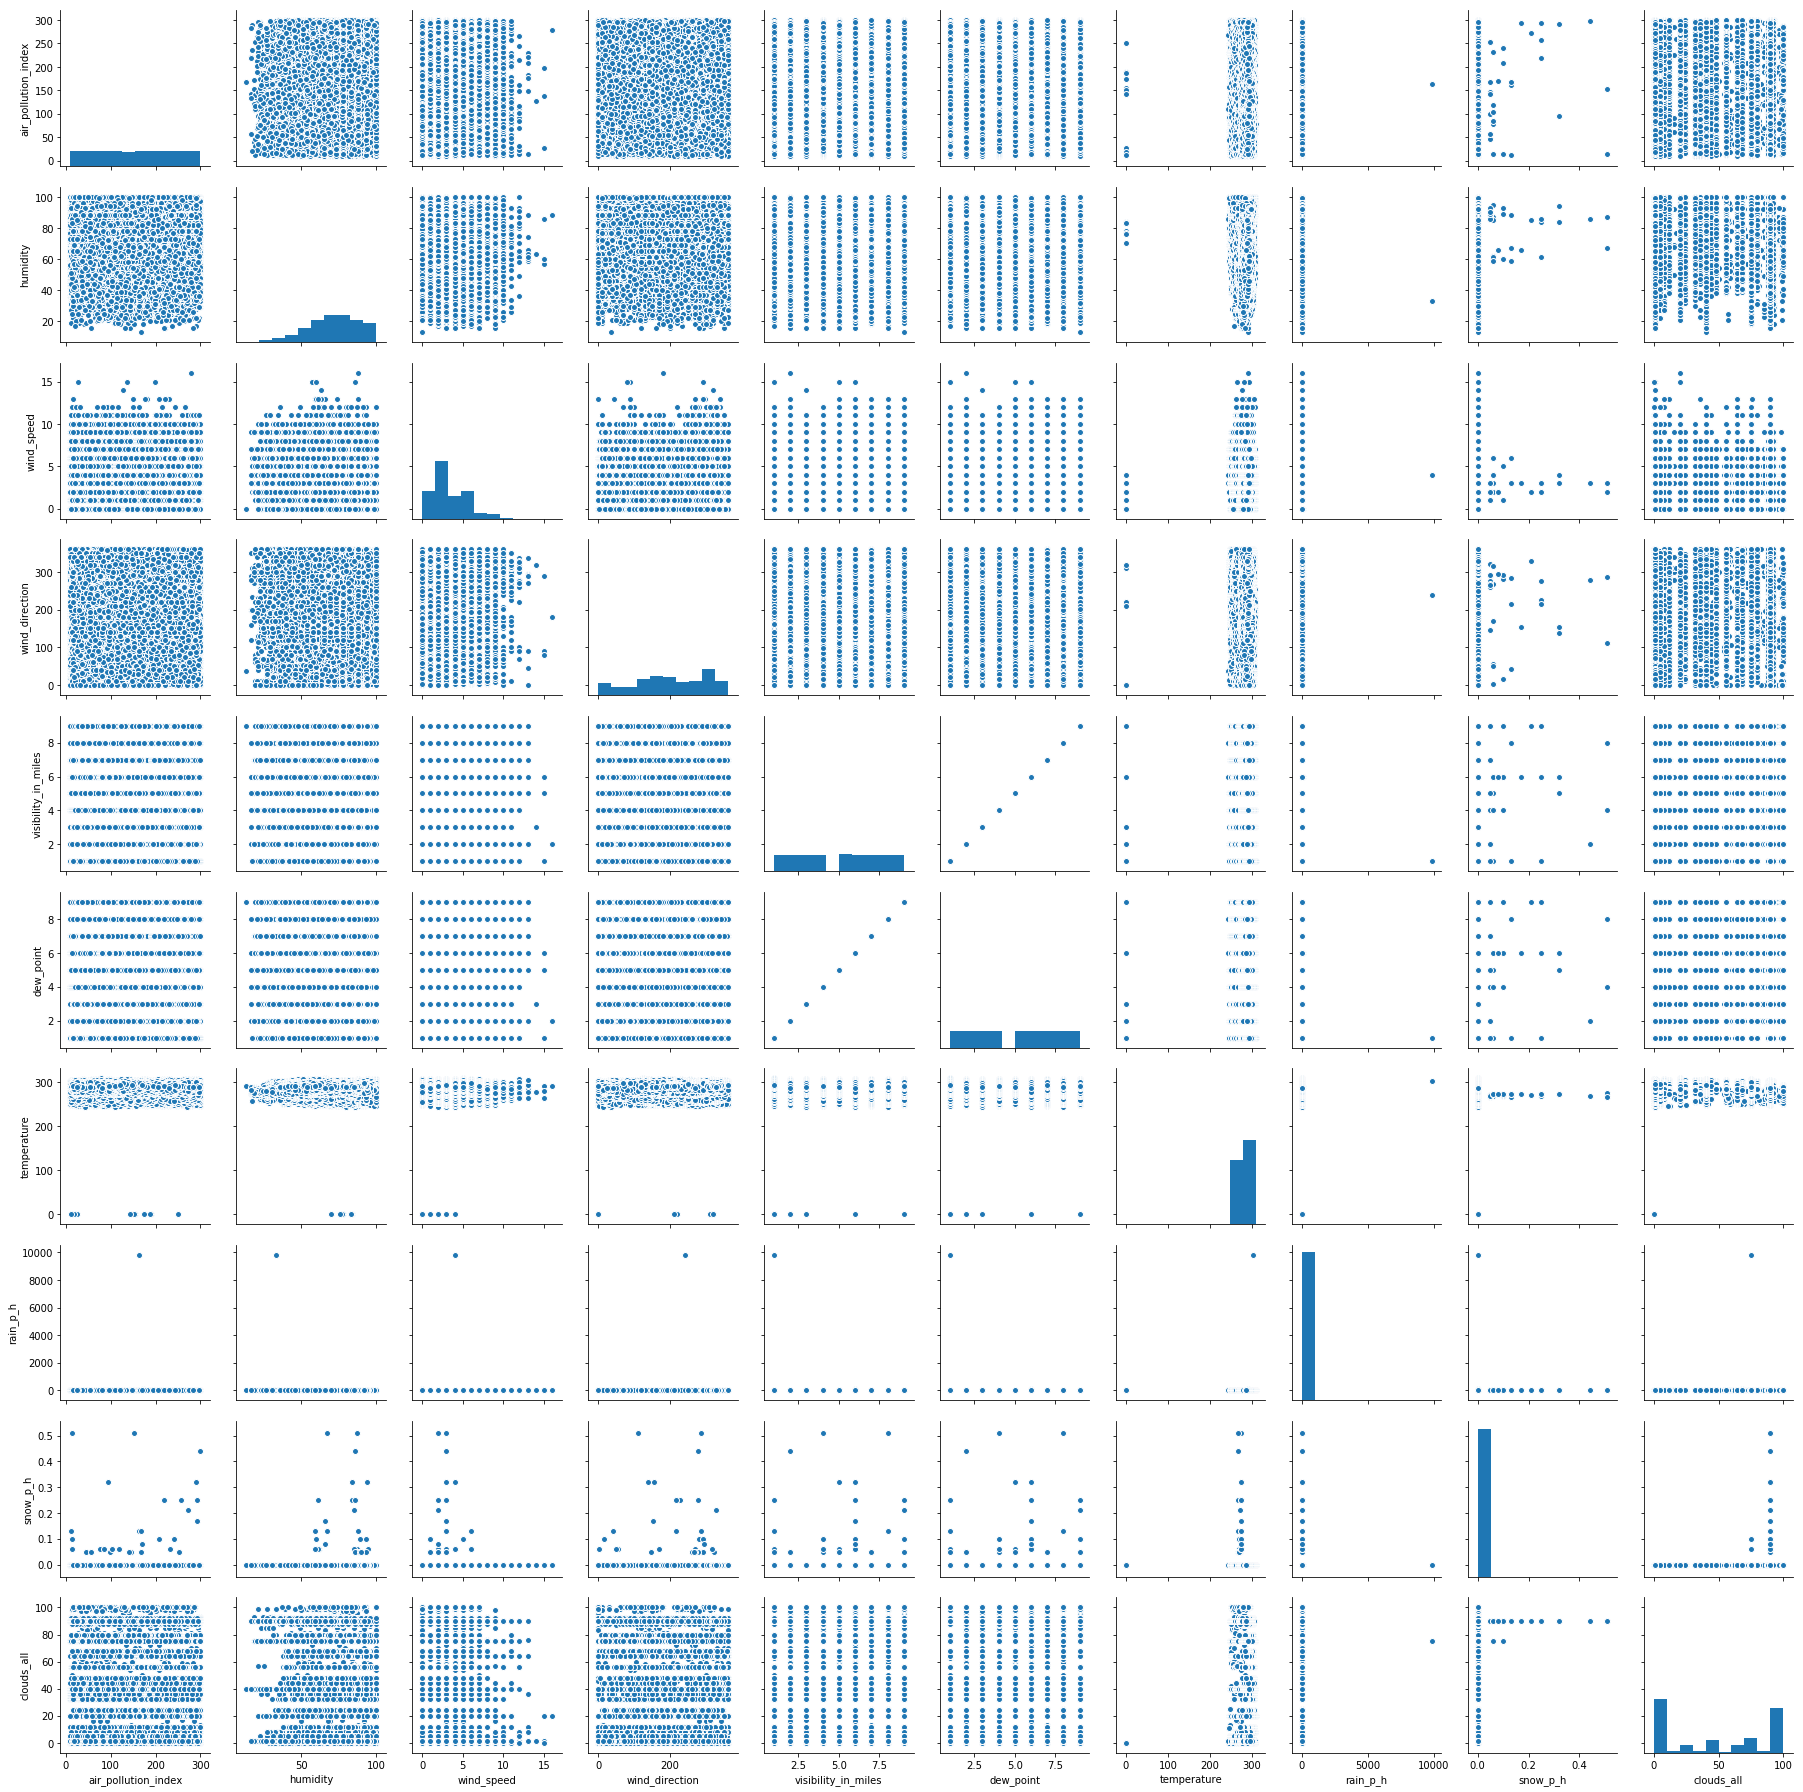

In [99]:
sns.pairplot(train[numeric_features])

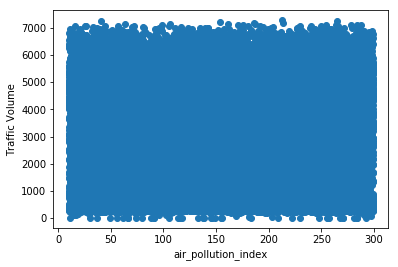

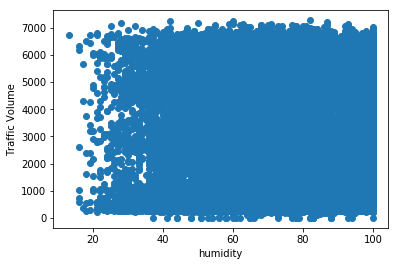

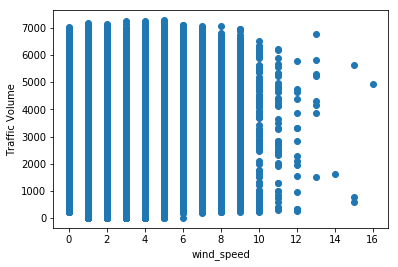

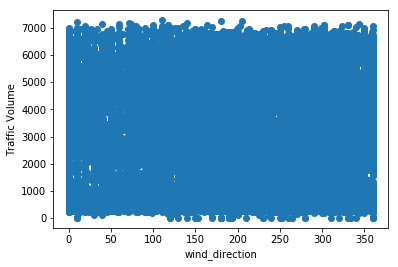

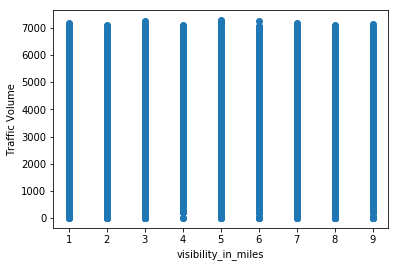

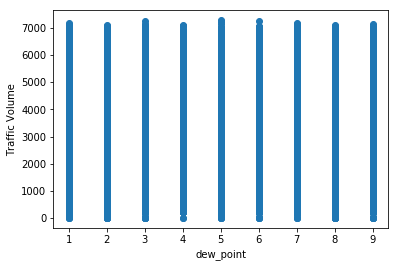

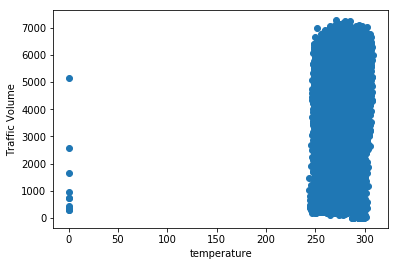

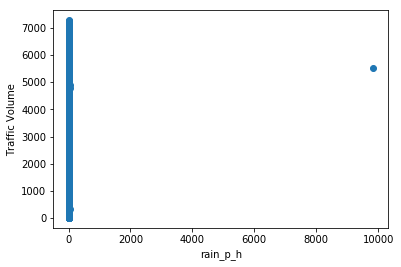

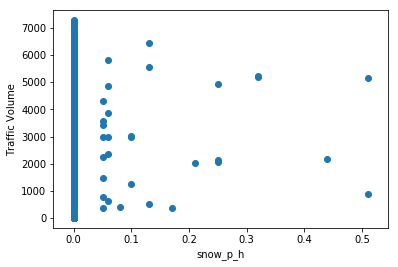

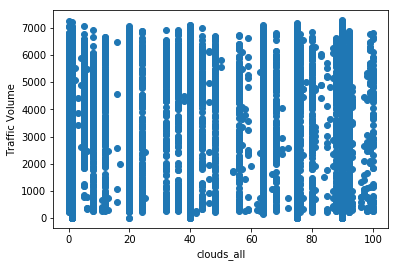

In [100]:
for i in numeric_features:
    plt.scatter(train[i], train['traffic_volume'])
    plt.xlabel(s=i)
    plt.ylabel(s='Traffic Volume')
    plt.show()

In [101]:
train['rain_p_h'].max()

9831.3

In [102]:
train['dew_point'].unique()

array([1, 2, 5, 7, 6, 3, 8, 4, 9])

In [103]:
train['visibility_in_miles'].unique()

array([1, 2, 5, 7, 6, 3, 8, 4, 9])

Points above numeric features:
1. Rain_p_h feature has only one outlier having highest value of 9831.3
2. visibilty in miles and dew points has 9 unique values and the data is almost equally distributed among these.

### Categorical variables

These three variables are categorical.
1. is_hoilday
2. weather_type 
3. weather_description 

In [11]:
cat_features =  ['is_holiday', 'weather_type', 'weather_description' ]

### Is_Hoilday

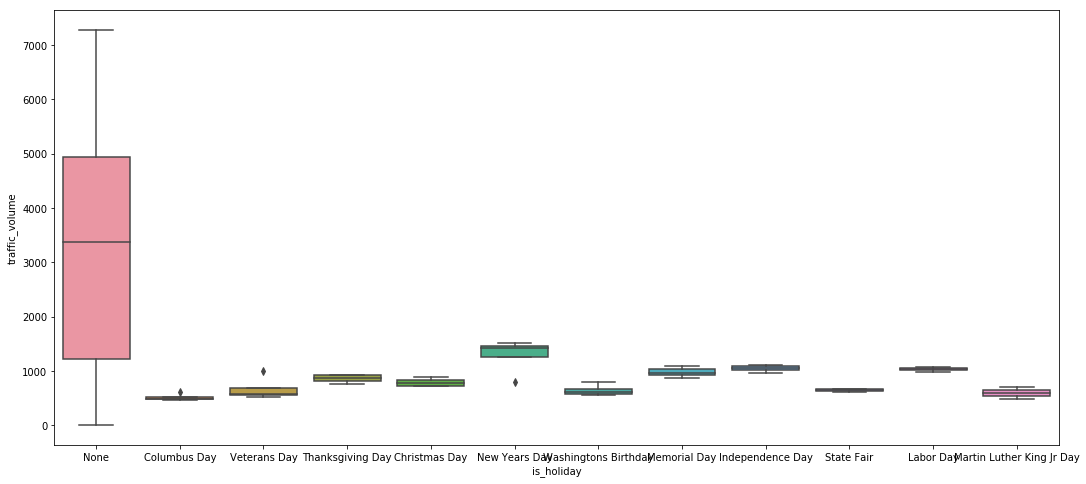

In [47]:
a4_dims = (18, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(x = 'is_holiday',y = 'traffic_volume',data=train)

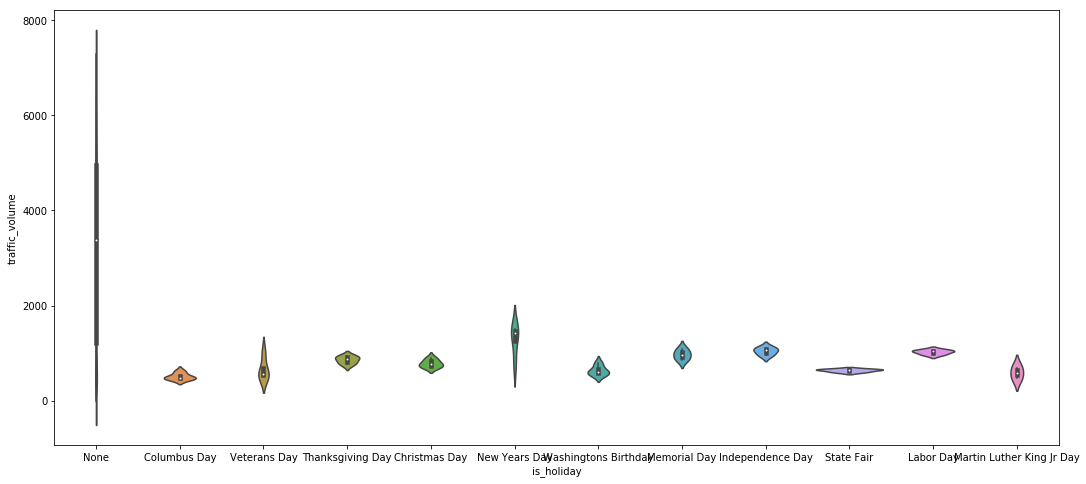

In [48]:
a4_dims = (18, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.violinplot(x = 'is_holiday',y = 'traffic_volume',data=train,ax=ax)

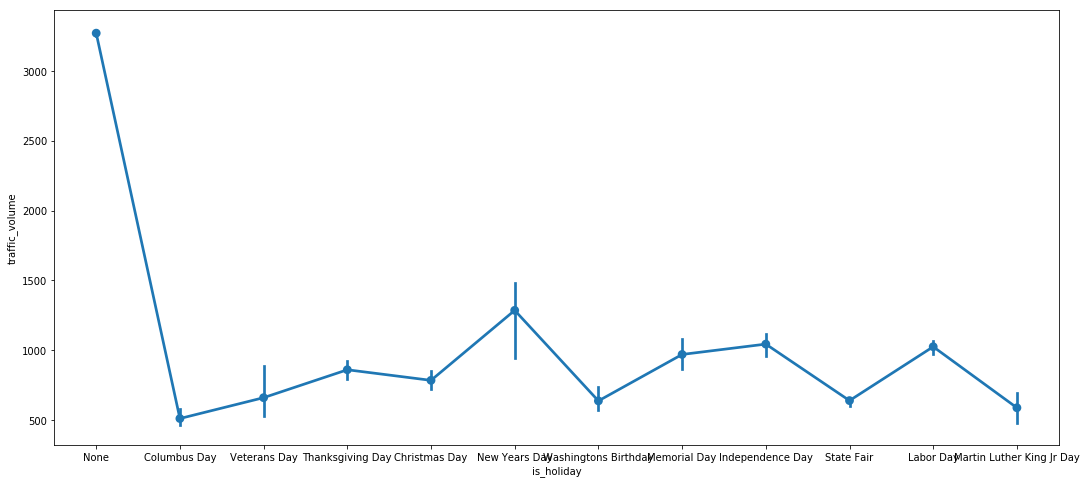

In [49]:
a4_dims = (18, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.pointplot(x = 'is_holiday',y = 'traffic_volume',data=train,ax=ax)

The above three graphs gives some of the points to be noted:
1. The traffic volume is higher in non hoilday days when compared to the hoilday days.
2. Traffic volume is below 2000 on non hoilday days.
3. From these graphs we can make a new feature from this is_hoildays feature.
4. The new feature can be whether it is a hoilday or not.
5. Two models can be made based on this new feature.

### Weather_type

In [50]:
train['weather_type'].unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Fog',
       'Thunderstorm', 'Haze', 'Snow', 'Squall', 'Smoke'], dtype=object)

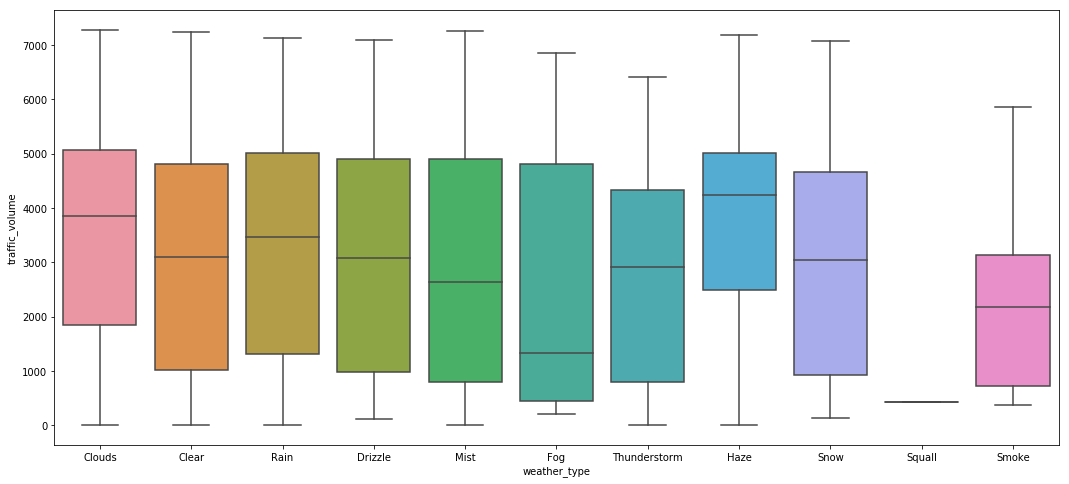

In [51]:
a4_dims = (18, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(x = 'weather_type',y = 'traffic_volume',data=train)

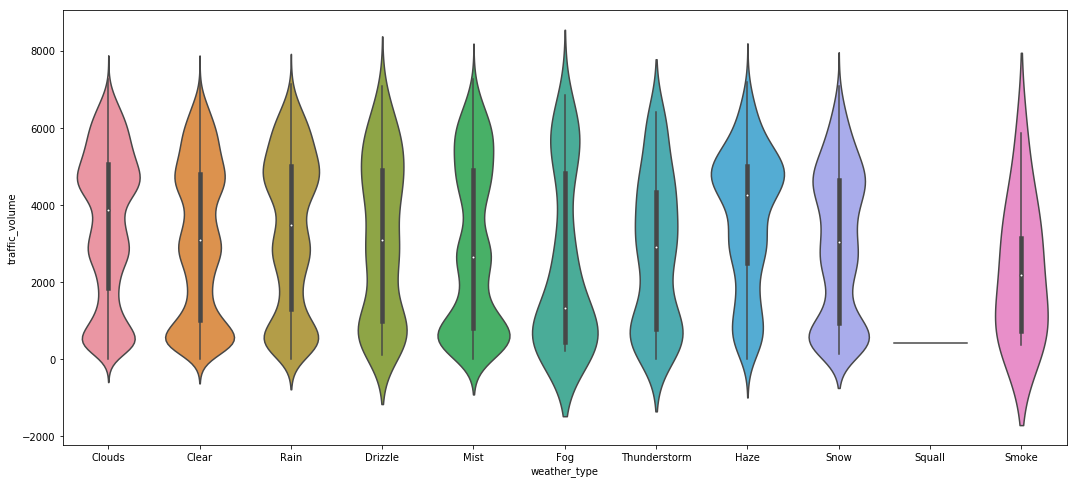

In [52]:
a4_dims = (18, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.violinplot(x = 'weather_type',y = 'traffic_volume',data=train,ax=ax)

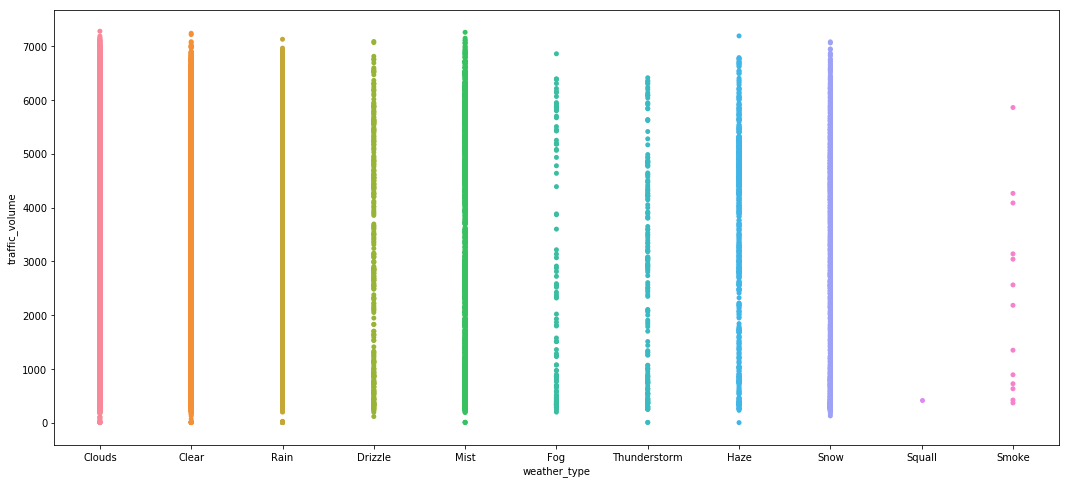

In [53]:
a4_dims = (18, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.stripplot(x = 'weather_type',y = 'traffic_volume',data=train,ax=ax)

In [54]:
train[train['weather_type']=='Squall'].shape

(1, 15)

In [55]:
test[test['weather_type']=='Squall'].shape

(0, 14)

In [56]:
train[train['weather_type']=='Smoke'].shape

(13, 15)

In [57]:
test[test['weather_type']=='Smoke'].shape

(3, 14)

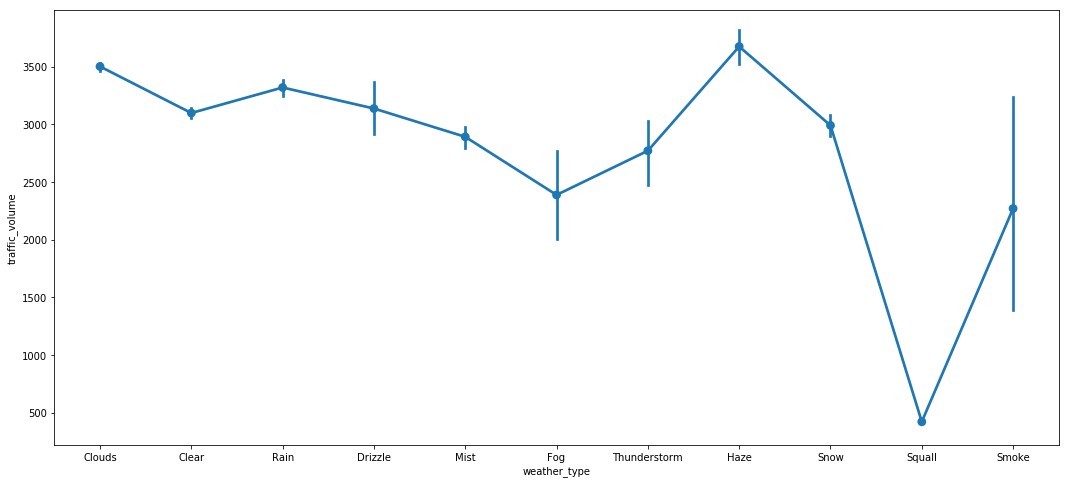

In [60]:
a4_dims = (18, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.pointplot(x = 'weather_type',y = 'traffic_volume',data=train,ax=ax)

Points to be noted are:
1. The data points for Squall is <b>Zero</b> in test data set.
2. Squall rows are <b>only 1</b> in training set.
3. Smoke weathertype data is also very less in train and test.
4. The distribution is shown in the boxplot for all the weather_types.

In [68]:
train[train['weather_type']=='Squall']

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
5958,2013-05-12 02:00:00,None,110,100,2,202,8,8,284.28,0.0,0.0,75,Squall,squalls,420


In [70]:
train.drop(index=5958, axis=0,inplace=True)

### weather_description

In [71]:
train['weather_description'].unique()

array(['scattered clouds', 'broken clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain',
       'light intensity drizzle', 'mist', 'fog', 'proximity shower rain',
       'moderate rain', 'drizzle', 'heavy intensity rain',
       'proximity thunderstorm', 'haze', 'heavy snow',
       'thunderstorm with light rain', 'snow', 'light rain and snow',
       'light intensity shower rain', 'proximity thunderstorm with rain',
       'thunderstorm with rain', 'thunderstorm with heavy rain',
       'heavy intensity drizzle', 'very heavy rain',
       'thunderstorm with light drizzle', 'thunderstorm', 'light snow',
       'smoke', 'freezing rain', 'light shower snow', 'sleet'],
      dtype=object)

Points:
1. 'Sky is Clear','sky is clear' are same. 

In [66]:
train['weather_description'] = train['weather_description'].apply(lambda x: x.lower())

In [72]:
for i in train['weather_description'].unique():
    print(i,train[train['weather_description']==i].shape)

scattered clouds (2285, 15)
broken clouds (3364, 15)
overcast clouds (3964, 15)
sky is clear (9212, 15)
few clouds (1562, 15)
light rain (2059, 15)
light intensity drizzle (222, 15)
mist (2095, 15)
fog (124, 15)
proximity shower rain (51, 15)
moderate rain (910, 15)
drizzle (95, 15)
heavy intensity rain (283, 15)
proximity thunderstorm (122, 15)
haze (548, 15)
heavy snow (472, 15)
thunderstorm with light rain (15, 15)
snow (97, 15)
light rain and snow (3, 15)
light intensity shower rain (7, 15)
proximity thunderstorm with rain (4, 15)
thunderstorm with rain (3, 15)
thunderstorm with heavy rain (8, 15)
heavy intensity drizzle (12, 15)
very heavy rain (18, 15)
thunderstorm with light drizzle (2, 15)
thunderstorm (26, 15)
light snow (1005, 15)
smoke (13, 15)
freezing rain (1, 15)
light shower snow (4, 15)
sleet (2, 15)


In [74]:
# These types are having data points less than 20.
weather_desc =  ['thunderstorm with light rain', 'light rain and snow','light intensity shower rain','proximity thunderstorm with rain','thunderstorm with rain',
 'thunderstorm with heavy rain','heavy intensity drizzle','very heavy rain','thunderstorm with light drizzle','smoke','freezing rain',
 'light shower snow','sleet']

In [75]:
weather = list(set(train['weather_description'].unique())-set(weather_desc))

In [77]:
print(len(weather))
weather

19


['proximity shower rain',
 'thunderstorm',
 'drizzle',
 'light intensity drizzle',
 'overcast clouds',
 'heavy intensity rain',
 'sky is clear',
 'light snow',
 'moderate rain',
 'broken clouds',
 'snow',
 'light rain',
 'heavy snow',
 'proximity thunderstorm',
 'haze',
 'mist',
 'scattered clouds',
 'fog',
 'few clouds']

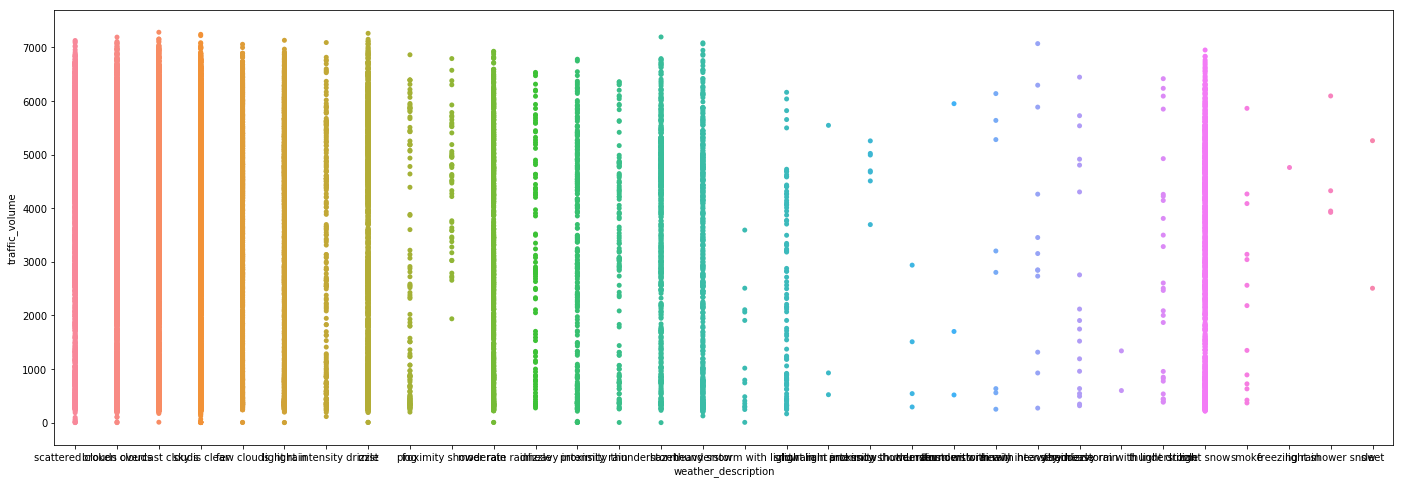

In [80]:
a4_dims = (24, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.stripplot(x = 'weather_description',y = 'traffic_volume',data=train,ax=ax)

Points to be noted are:
1. There are some weather descriptions which are having very less data.
2. We can combine all such descriptions into other similar types based on weather_type.